To load the MNIST data with PyTorch, you can use the torchvision package, which provides a set of utilities for loading and transforming datasets, including the MNIST dataset. Here's an example of how you can load the MNIST training data with torchvision:

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# Transform the data to tensors and normalize it
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the training data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

# Test Data
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

2.0%

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




7.9%

100.0%
100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



To view the first examples in the MNIST dataset after loading it with PyTorch, you can use the iter function to retrieve the first mini-batch of examples from the data loader, and then use the `.numpy()` method to convert the tensors to numpy arrays, which can be easily plotted using Matplotlib or a similar library.

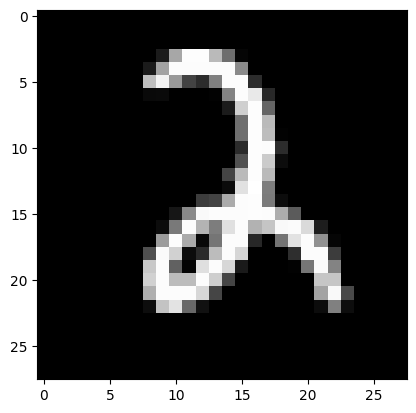

In [5]:
import matplotlib.pyplot as plt

# Get the first batch of training examples
images, labels = next(iter(trainloader))

# Convert the images to numpy arrays and plot them
plt.imshow(images[0].numpy().squeeze(), cmap='gray')
plt.show()


The .squeeze() method is used to remove single-dimensional entries from the shape of an array. In the case of image data, this is often used to remove the singleton dimensions from the shape of the tensor that represent the number of color channels.

For example, if you have an image tensor with shape (1, 28, 28), which represents a single grayscale image with height 28 and width 28, you can use .squeeze() to remove the leading dimension with size 1, resulting in a tensor with shape (28, 28):

In [6]:
image_tensor = torch.tensor([[[1.0, 2.0, 3.0],
                              [4.0, 5.0, 6.0],
                              [7.0, 8.0, 9.0]]])

image_tensor.shape  # (1, 3, 3)
image_tensor.squeeze().shape  # (3, 3)


torch.Size([3, 3])

In [7]:
labels[0]

tensor(2)

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 5
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=False)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=100,
                                          shuffle=False)

# Neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size=28*28, hidden_size=500, num_classes=10).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients


Epoch [1/5], Step [100/600], Loss: 0.3398
Epoch [1/5], Step [200/600], Loss: 0.2516
Epoch [1/5], Step [300/600], Loss: 0.2974
Epoch [1/5], Step [400/600], Loss: 0.2057
Epoch [1/5], Step [500/600], Loss: 0.2116
Epoch [1/5], Step [600/600], Loss: 0.2058
Epoch [2/5], Step [100/600], Loss: 0.1313
Epoch [2/5], Step [200/600], Loss: 0.1723
Epoch [2/5], Step [300/600], Loss: 0.1451
Epoch [2/5], Step [400/600], Loss: 0.1027
Epoch [2/5], Step [500/600], Loss: 0.0419
Epoch [2/5], Step [600/600], Loss: 0.1451
Epoch [3/5], Step [100/600], Loss: 0.1168
Epoch [3/5], Step [200/600], Loss: 0.0360
Epoch [3/5], Step [300/600], Loss: 0.1214
Epoch [3/5], Step [400/600], Loss: 0.0231
Epoch [3/5], Step [500/600], Loss: 0.0956
Epoch [3/5], Step [600/600], Loss: 0.0470
Epoch [4/5], Step [100/600], Loss: 0.0342
Epoch [4/5], Step [200/600], Loss: 0.0475
Epoch [4/5], Step [300/600], Loss: 0.0354
Epoch [4/5], Step [400/600], Loss: 0.0310
Epoch [4/5], Step [500/600], Loss: 0.0798
Epoch [4/5], Step [600/600], Loss:

In [15]:
# Test the model
model.eval()  # Set the model to evaluation mode


with torch.no_grad():
    correct = 0
    total = 0


# Iterate through the test data
for images, labels in test_loader:
    # Move the data to the device where the model is running
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)

    # Get the predictions
    _, predicted = torch.max(outputs.data, 1)

    # Update the accuracy
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

# Print the accuracy
print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the network on the 10000 test images: 97.78 %
